In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [5]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [6]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [11]:
df.drop_duplicates(inplace=True)

# Remove '$' and ',' from 'price' and 'service fee'
print(df.columns) # Add this line to check column names
df['price'] = df['price'].astype(str).str.replace('$', '', regex = False)
df['price'] = df['price'].str.replace(',', '', regex = False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex = False)
df['service fee'] = df['service fee'].str.replace(',', '', regex = False)

# Rename columns
df.rename(columns={
    'price': 'Price',
    'service fee': 'Service_fee_$'
},inplace = True)

# Convert to float after cleaning and renaming
df['Price'] = df['Price'].astype(float)
df['Service_fee_$'] = df['Service_fee_$'].astype(float)

df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].fillna(0).astype(int)
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'
df = df.drop(df[df['availability 365'] > 500].index)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


In [12]:
df.duplicated().value_counts()

,count
False,102057


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102057 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102057 non-null  object        
 1   NAME                            101787 non-null  object        
 2   host id                         102057 non-null  object        
 3   host_identity_verified          101768 non-null  object        
 4   host name                       101651 non-null  object        
 5   neighbourhood group             102028 non-null  object        
 6   neighbourhood                   102041 non-null  object        
 7   lat                             102049 non-null  float64       
 8   long                            102049 non-null  float64       
 9   country                         101525 non-null  object        
 10  country code                    101926 non-null  object      

In [14]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,53428
Private room,46306
Shared room,2208
Hotel room,115


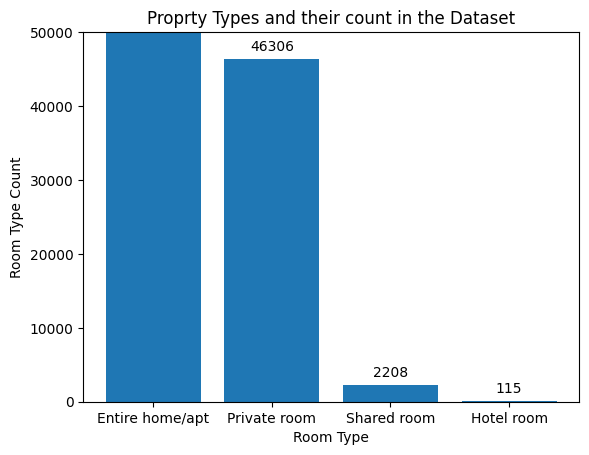

In [16]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels = property_types.loc[:,"count"],padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Proprty Types and their count in the Dataset');

In [17]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,43556
Brooklyn,41631
Queens,13197
Bronx,2694
Staten Island,949
manhatan,1


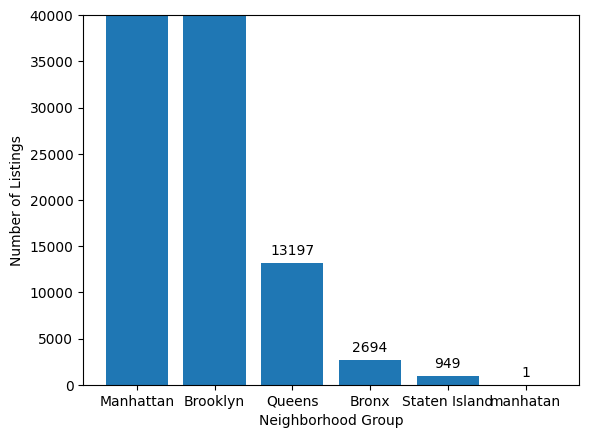

In [18]:
hood_group_bar = plt.bar(hood_group.index,hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels = hood_group.loc[:,"count"],padding = 4);
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Number of Listings');

Text(0.5, 1.0, 'Average Price Per Listings ($) in each Neighborhood Group')

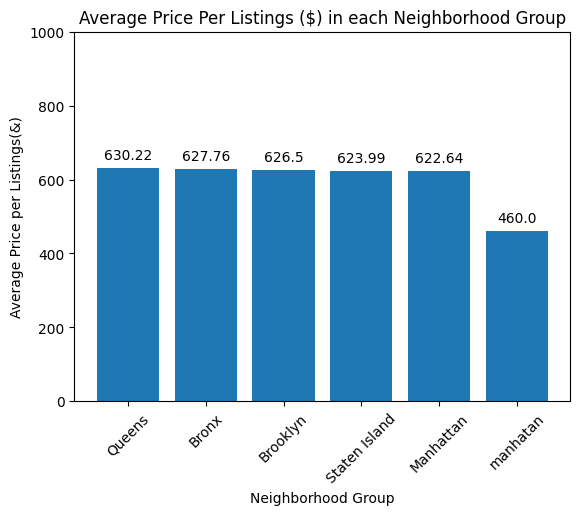

In [22]:
# print(df.columns) # Removed the print statement as it's no longer needed
avg_price = df.groupby('neighbourhood group')['Price'].mean().sort_values(ascending=False).to_frame() # Changed 'price' to 'Price'
avg_price_bar = plt.bar(avg_price.index,avg_price.loc[:,"Price"]); # Changed 'price' to 'Price'
plt.bar_label(avg_price_bar,labels =round(avg_price.loc[:,"Price"],2),label_type = 'edge',padding = 4); # Changed 'price' to 'Price'
plt.ylim([0,1000]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per Listings(&)');
plt.xticks(rotation = 45);
plt.title('Average Price Per Listings ($) in each Neighborhood Group')

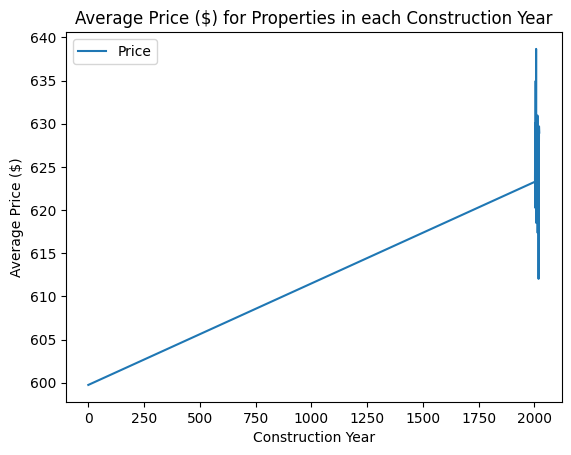

In [24]:
df.groupby(df['Construction year'])['Price'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

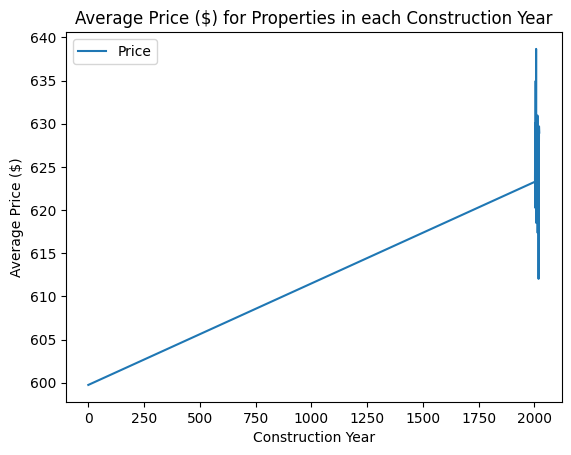

In [25]:
df.groupby(df['Construction year'])['Price'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

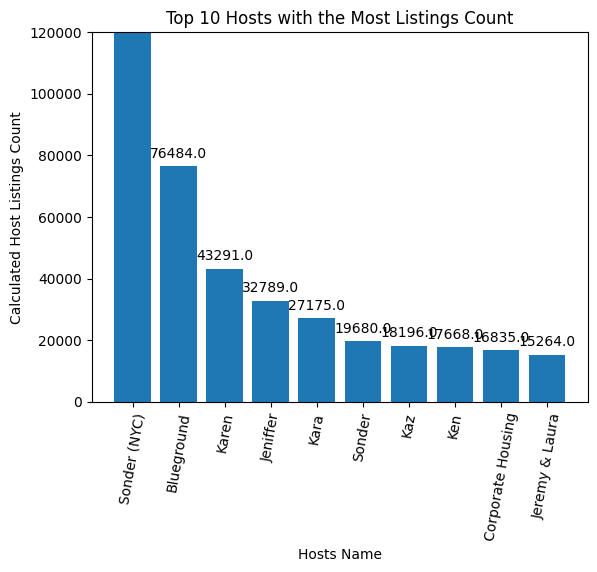

In [27]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index,hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar,labels = hosts.loc[:,"calculated host listings count"],label_type ='edge',padding = 4);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation =80);
plt.ylim([0,120000]);
plt.title('Top 10 Hosts with the Most Listings Count');

In [28]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.285641
unconfirmed,3.272033


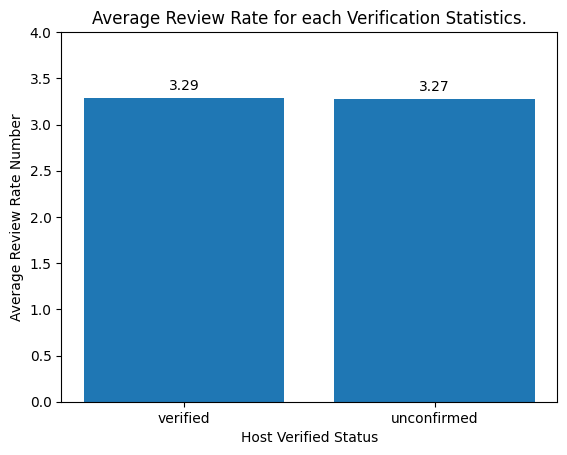

In [29]:
review_bar = plt.bar(review.index,review.loc[:,"review rate number"]);
plt.bar_label(review_bar,labels = round(review.loc[:,"review rate number"],2),padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verified Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics.');

In [33]:
df['Price'].corr(df['Service_fee_$'])

np.float64(0.9999908752435227)

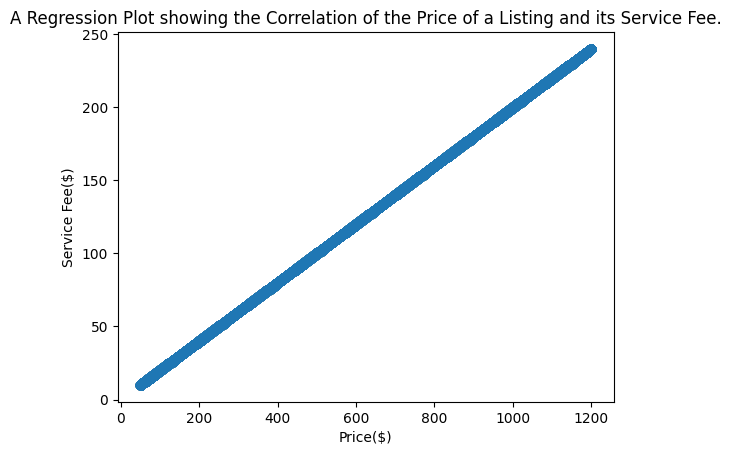

In [34]:
sns.regplot(df,x = 'Price',y = 'Service_fee_$');
plt.xlabel('Price($)');
plt.ylabel('Service Fee($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

In [35]:
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.346154
                    Private room               3.326873
                    Shared room                3.260870
Brooklyn            Entire home/apt            3.249963
                    Hotel room                 3.857143
                    Private room               3.263716
                    Shared room                3.334957
Manhattan           Entire home/apt            3.275803
                    Hotel room                 3.500000
                    Private room               3.277448
                    Shared room                3.254199
Queens              Entire home/apt            3.349306
                    Hotel room                 3.750000
                    Private room               3.315584
                    Shared room                3.369748
Staten Island       Entire home/apt            3.329087
                    Private room               3.477024
                    Shared room                3.533333
manhatan            Private room               3.000000

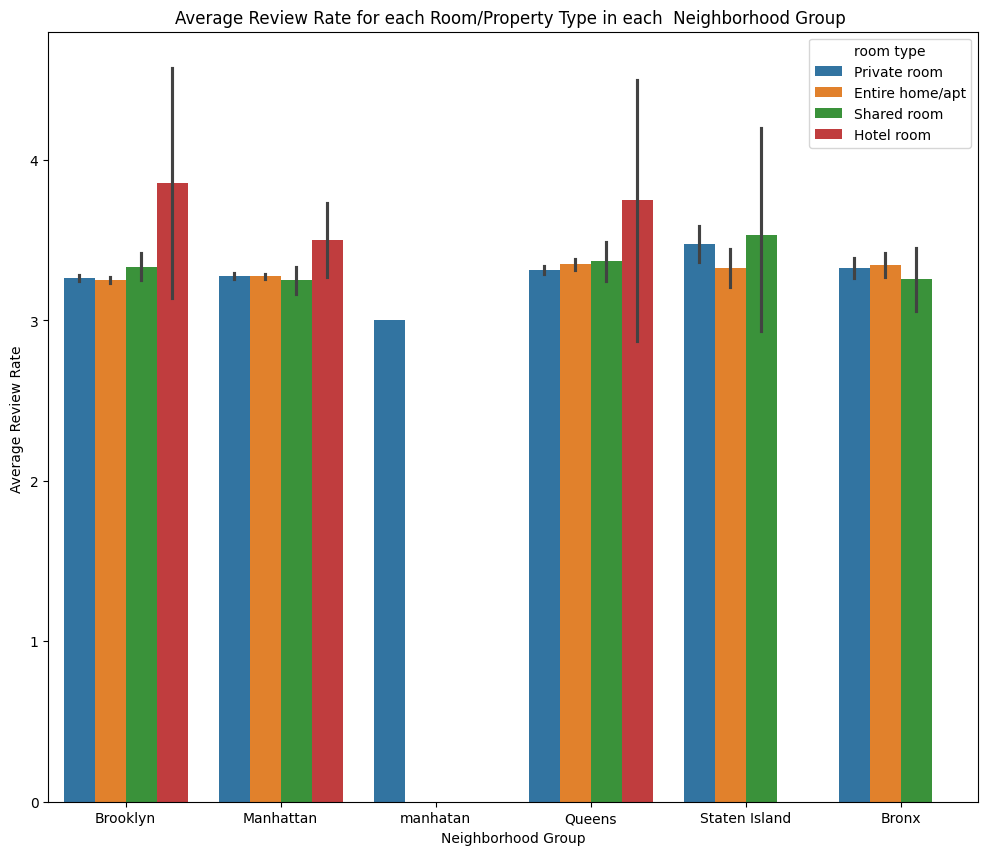

In [36]:
plt.figure(figsize =[12,10]);
sns.barplot(data=df,x = 'neighbourhood group' , y = 'review rate number',hue = 'room type');
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Review Rate ');
plt.title('Average Review Rate for each Room/Property Type in each  Neighborhood Group ');

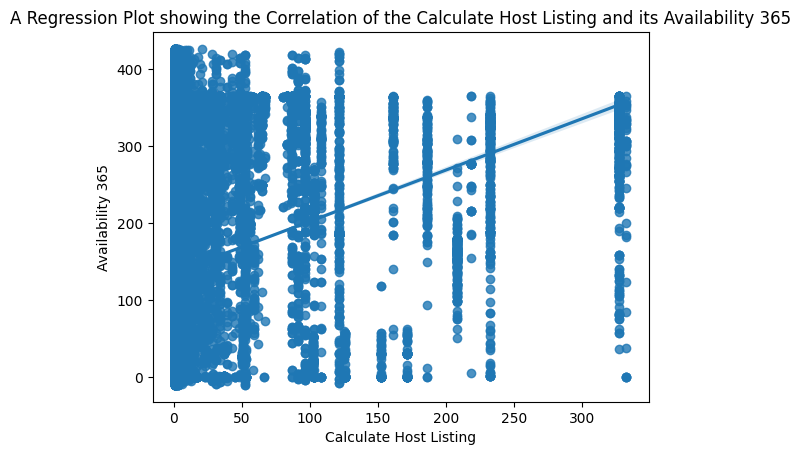

In [37]:
sns.regplot(df,x='calculated host listings count',y = 'availability 365');
plt.xlabel('Calculate Host Listing');
plt.ylabel("Availability 365");
plt.title('A Regression Plot showing the Correlation of the Calculate Host Listing and its Availability 365');

In [38]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.15959891314313554)